**Лекция 3**

# Условная вероятность. Формула Байеса

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условная-вероятность" data-toc-modified-id="Условная-вероятность-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условная вероятность</a></span><ul class="toc-item"><li><span><a href="#Интуиция-и-определение" data-toc-modified-id="Интуиция-и-определение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Интуиция и определение</a></span></li><li><span><a href="#Свойства-условной-вероятности" data-toc-modified-id="Свойства-условной-вероятности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Свойства условной вероятности</a></span></li><li><span><a href="#Теорема-Байеса" data-toc-modified-id="Теорема-Байеса-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Теорема Байеса</a></span></li><li><span><a href="#Независимость" data-toc-modified-id="Независимость-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Независимость</a></span></li></ul></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Примеры</a></span><ul class="toc-item"><li><span><a href="#Три-монеты" data-toc-modified-id="Три-монеты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Три монеты</a></span></li><li><span><a href="#Детектор-молекул" data-toc-modified-id="Детектор-молекул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Детектор молекул</a></span></li></ul></li><li><span><a href="#Отношение-шансов-и-отношение-правдоподобия" data-toc-modified-id="Отношение-шансов-и-отношение-правдоподобия-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отношение шансов и отношение правдоподобия</a></span><ul class="toc-item"><li><span><a href="#Определение" data-toc-modified-id="Определение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение</a></span></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Примеры</a></span></li><li><span><a href="#Дополнительно" data-toc-modified-id="Дополнительно-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дополнительно</a></span><ul class="toc-item"><li><span><a href="#Отношение-правдоподобия-и-экспертиза" data-toc-modified-id="Отношение-правдоподобия-и-экспертиза-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Отношение правдоподобия и экспертиза</a></span></li><li><span><a href="#Жульничает-ли-архиепископ-Кентерберийский?" data-toc-modified-id="Жульничает-ли-архиепископ-Кентерберийский?-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Жульничает ли архиепископ Кентерберийский?</a></span></li></ul></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = matplotlib.pyplot.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# %config Completer.use_jedi = False

---

> Теорема Байеса &mdash; это научно корректный способ менять наше мнение на основании новых фактов.

## Условная вероятность


### Интуиция и определение

Игральная кость подбрасывается один раз.
Известно, что выпало более трёх очков. Какова при этом вероятность того, что выпало нечётное число очков?

Пусть событие $A = \{4, 5, 6\}$ означает, что выпало более трёх очков, событие $B = \{1, 3, 5\}$ &mdash; выпало нечётное число очков.
Как вычислить вероятность события $B$, если известно, что $A$ случилось?
Мы знаем, что произошло событие $A$, но всё равно не знаем, что именно выпало на кости.
Однако теперь возможностей осталось только три: могло выпасть 4, 5 или 6 очков.
Событию $B$ из этих равновозможных исходов благоприятен единственный исход: выпадение пяти очков.
Поэтому искомая вероятность равна $1/3$.

Итак, при вычислении условной вероятности события $B$ при случившемся событии $A$ мы ищем долю исходов, благоприятствующих $B$, среди всех исходов события $A$.
Эту условную вероятность будем обозначать $\mathrm{P}(B|A)$.

Дадим теперь определение условной вероятности, согласующееся с интуитивными представлениями о ней.

**Определение.** Условной вероятностью события $B$ при условии события $A$ с $\mathrm{P}(A)>0$ называется величина
$$ \mathrm{P}(B|A) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(A)}. $$

### Свойства условной вероятности

Все общие теоремы о вероятностях верны также и для условных вероятностей, если эти условные вероятности берутся при одном и том же условии $A$.

1. $\mathrm{P}(A|A) = 1$,
1. $\mathrm{P}(\emptyset|A) = 0$,
1. $\mathrm{P}(B|A) = 1$, $B \supseteq A$,
1. $\mathrm{P}(B_1 + B_2|A) = \mathrm{P}(B_1|A) + \mathrm{P}(B_2|A) - \mathrm{P}(B_1 B_2|A)$.

> **Пример.** Рассмотрим семьи, имеющие двух детей. Спрашивается, какова вероятность того, что в семье оба ребёнка мальчики, в предположении, что:
1. старший ребёнок &mdash; мальчик (1/2);
2. по крайней мере один из детей &mdash; мальчик (1/3)?

**Формула полной вероятности**

Рассмотрим *полную группу несовместимых (непересекающихся) событий* $\mathcal{D} = \{A_1, \dots, A_n\}$.
Имеет место *формула полной вероятности*
$$ \mathrm{P}(B) = \sum_{i=1}^n \mathrm{P}(B|A_i) \mathrm{P}(A_i). $$

> **Пример.** В урне имеется $M$ шаров, среди которых $m$ &laquo;счастливых&raquo;. Спрашивается, какова вероятность извлечь на втором шаге &laquo;счастливый&raquo; шар (предполагается, что качество первого извлеченного шара неизвестно). \
*Ответ:* $\frac{m}{M}$.

**Формула умножения вероятностей**

Из определения условной вероятности получим формулу *умножения вероятностей*:
$$ \mathrm{P}(AB) = \mathrm{P}(B|A) \mathrm{P}(A). $$

Формула умножения вероятностей обобщается по индукции:
$$ \mathrm{P}(A_1 \ldots A_n) = \mathrm{P}(A_n|A_1 \ldots A_{n-1}) \, \mathrm{P}(A_{n-1}|A_1 \ldots A_{n-2}) \ldots \mathrm{P}(A_2 |A_1) \, \mathrm{P}(A_1) . $$

### Теорема Байеса

Из формул $\mathrm{P}(B|A) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(A)}$ и $\mathrm{P}(A|B) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(B)}$ получаем **формулу Байеса**:
$$ \mathrm{P}(B|A) = \dfrac{\mathrm{P}(A|B) \, \mathrm{P}(B)}{\mathrm{P}(A)}. $$

Если события $B_1, \dots, B_n$ образуют разбиение $\Omega$, то из формул полной вероятности и Байеса следует **теорема Байеса**:
$$ \mathrm{P}(B_i|A) = \frac{\mathrm{P}(A|B_i) \, \mathrm{P}(B_i)}{\sum_{j=1}^{n} \mathrm{P}(A|B_j) \,\mathrm{P}(B_j)}. $$

В статистических применениях события $H_1, \dots, H_n$ образующие &laquo;полную группу событий&raquo; ($H_1 + \dots + H_n = \Omega$), часто называют &laquo;гипотезами&raquo;, а $\mathrm{P}(H_i)$ &mdash; *априорной* вероятностью гипотезы $H_i$.
Условная вероятность $\mathrm{P}(H_i|D)$ трактуется как *апостериорная* вероятность гипотезы $H_i$ после наступления события (наблюдения данных) $D$.

Формула Байеса даёт возможность получить ответ на вопрос о том, как изменится постериорная вероятность $\mathrm{P}(H|D)$ гипотезы $H$ при данных наблюдения $D$ (т.е. оценка, полученная после изучения новых экспериментальных данных), при условии, что известны априорная вероятность этой гипотезы $\mathrm{P}(H)$ (т.е. оценка, полученная без учета данных $D$), вероятность получения данных $\mathrm{P}(D)$ и условная вероятность $\mathrm{P}(D|H)$ получить данные $D$, если гипотеза $H$ выполнена. \
В этом случае величину $\mathrm{P}(D|H)$ называют *правдоподобием* гипотезы $H$ с учётом данных $D$.

### Независимость

**Определение.** События $A$ и $B$ называются *независимыми* или *статистически независимыми* (относительно вероятности $\mathrm{P}$), если
$$ \mathrm{P}(AB) = \mathrm{P}(A) \cdot \mathrm{P}(B). $$

Для независимых событий получаем закономерный результат:
$$ \mathrm{P}(B|A) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(A)} = \dfrac{\mathrm{P}(A)\mathrm{P}(B)}{\mathrm{P}(A)} = \mathrm{P}(B). $$

## Примеры

### Три монеты

У вас в кармане три монеты: на одной два орла, на другой две решки, третья обычная.
Вы наугад вытаскиваете монету, подбрасываете ее, и выпадает орёл.
Какова вероятность, что на другой стороне монеты тоже орёл?

Многие бы решили, что ответ &mdash; $1/2$, поскольку монета либо обычная, либо с двумя орлами, и вероятность выбрать одну из них одинакова.
Существует много способов это проверить, но проще всего использовать идею с *ожидаемыми количествами*.

Подумаем, чего можно ожидать, если проделать такой эксперимент шесть раз.
В среднем каждая монета будет выбрана дважды, и каждая из сторон выпадет по разу.
Орёл выпадает в трех случаях, причем в двух на второй стороне также будет орёл.
Поэтому вероятность того, что на второй стороне монеты тоже орёл, равна $2/3$, а не $1/2$.
По сути, выпадение орла повышает вероятность выбора монеты с двумя орлами, ведь у такой монеты есть два варианта упасть орлом вверх, а у симметричной &mdash; только один.

> Иллюстрации с прямым и обращённым деревьями ожидаемых количеств.

### Детектор молекул

Используемый в эксперименте детектор сложных молекул правильно различает молекулы $A$ и $B$ в $90\,\%$ случаев, т.е. $\mathrm{P}(a|A) = 0.9$, $\mathrm{P}(b|B) = 0.9$, где $a$ и $b$ означают результат тестирования для соответствующей молекулы.
Следовательно, вероятности ошибочных результатов равны $\mathrm{P}(b|A) = \mathrm{P}(a|B) = 0.1$.
Эти цифры характеризуют аппаратную надёжность тестов.

Известно, что молекулы типов $A$ и $B$ в потоке частиц встречаются с вероятностями $\mathrm{P}(A) = 0.95$ и $\mathrm{P}(B) = 0.05$ соответственно.

**Задача 1**\
Какова вероятность того, что детектор покажет молекулу $B$?

**Решение**\
Требуется найти вероятность $\mathrm{P}(b)$. Она состоит из ложноположительной и &laquo;правдивоположительной&raquo; частей.

$$
  \mathrm{P}(b) = \mathrm{P}(b|B) \mathrm{P}(B) + \mathrm{P}(b|A) \mathrm{P}(A)
= 0.9 \cdot 0.05 + 0.1 \cdot 0.95 = 0.14
$$

**Задача 2**\
Какова вероятность $\mathrm{P}(B|b)$ того, что молекула действительно имеет тип $B$ при условии, что об этом свидетельствует результат тестирования $b$?

**Решение**\
Воспользуемся теоремой Байеса.
$$
  \mathrm{P}(B|b) = \dfrac{\mathrm{P}(Bb)}{\mathrm{P}(b)} = \dfrac{\mathrm{P}(b|B) \mathrm{P}(B)}{\mathrm{P}(b|B)\mathrm{P}(B) + \mathrm{P}(b|A)\mathrm{P}(A)}, \tag{1}\label{eq:PBb}
$$

$$
 \mathrm{P}(B|b) = \dfrac{0.9 \cdot 0.05}{0.9 \cdot 0.05 + 0.1 \cdot 0.95} = 0.321.
$$

In [4]:
p1 = 0.9*0.05/(0.9*0.05 + 0.1*0.95)
print(p1)

0.32142857142857145


**Задача 3**\
В задаче из примера 2 после первого детектора поставили такой же второй. \
Пусть оба детектора показывают результат &laquo;b&raquo;: $b_1$ и $b_2$.
Как при этом изменится вероятность ложноположительного результата?
Вероятность ошибки должна уменьшиться, но насколько именно?

**Решение**\
Применим формулу Байеса для события $\{b_1 \cap b_2\}$:
$$
  \mathrm{P}(B|b_1 b_2) = \dfrac{\mathrm{P}(b_1 b_2|B)\mathrm{P}(B)}{\mathrm{P}(b_1 b_2)}.
$$

Обратим внимание, что события $b_1$ и $b_2$, не являясь независимыми сами по себе, являются независимыми для каждой из частиц по отдельности.
То есть $\mathrm{P}(b_1 b_2) \ne \mathrm{P}(b_1)\mathrm{P}(b_2)$, но $\mathrm{P}(b_1 b_2|B) = \mathrm{P}(b_1|B)\mathrm{P}(b_2|B)$.

Поэтому
$$
  \mathrm{P}(B|b_1 b_2) = \dfrac{\mathrm{P}(b_1|B)\mathrm{P}(b_2|B) \mathrm{P}(B)}{\mathrm{P}(b_1|B)\mathrm{P}(b_2|B) \mathrm{P}(B) + \mathrm{P}(b_1|A)\mathrm{P}(b_2|A)\mathrm{P}(A)}, \tag{2}\label{eq:PBbb}
$$

$$
  \mathrm{P}(B|b_1 b_2) = \dfrac{0.9 \cdot 0.9 \cdot 0.05}{0.9 \cdot 0.9 \cdot 0.05 + 0.1 \cdot 0.1 \cdot 0.95} = 0.81.
$$

In [5]:
p2 = 0.9*0.9*0.05/(0.9*0.9*0.05 + 0.1*0.1*0.95)
print(p2)

0.81


К такому же результату можно прийти несколько иначе.

Рассмотрим работу двух детекторов.
Сами по себе показания детекторов независимыми не являются: если сработал первый, то, скорее всего сработает и второй $\mathrm{P}(b_1b_2) \ne \mathrm{P}(b_1) \cdot \mathrm{P}(b_2)$.
Однако, если тип частицы известен, детекторы работают независимо: $\mathrm{P}(b_1b_2|B) = \mathrm{P}(b_1|B) \cdot \mathrm{P}(b_2|B)$.
Тогда апостериорную вероятность первого детектора $\mathrm{P}(B|b)$ можно рассматривать как априорную вероятность для второго детектора:

$$
  \mathrm{P}(B|b_1 b_2) = \dfrac{\mathrm{P}(B b_1 b_2)}{\mathrm{P}(b_1 b_2)} = \dfrac{\mathrm{P}(b_2|B)\mathrm{P}(B|b_1)}{\mathrm{P}(b_2|B)\mathrm{P}(B|b_1) + \mathrm{P}(b|A)\mathrm{P}(A|b_1)}.
$$

Легко проверить, что подстановка в данное выражение формулы ([1](#mjx-eqn-eq:PBb)) даёт формулу ([2](#mjx-eqn-eq:PBbb)).

> **Задача.** Какова вероятность $\mathrm{P}(b_2|b_1)$ того, что второй детектор покажет &laquo;b&raquo;, если первый тоже показывает &laquo;b&raquo;? \
(*Ответ:* 0.357)

---

## Отношение шансов и отношение правдоподобия

### Определение

Рассмотрим две конкурирующие гипотезы $H_1$ и $H_2$.\
*Отношение правдоподобия* &mdash; это вероятность некоторого факта $D$ при условии гипотезы $H_1$, делённая на вероятность того же факта при условии гипотезы $H_2$: $LR = \dfrac{\mathrm{P}(D|H_1)}{\mathrm{P}(D|H_2)}$.

> Отношение правдоподобия &mdash; это отношение вероятности получить некоторые данные при верной гипотезе к вероятности получить такие же данные при неверной гипотезе.

Отношение правдоподобия фактически сравнивает относительную поддержку, предоставляемую неким фактом (свидетельством, доказательством) для двух конкурирующих гипотез, например, означающих виновность и невиновность.

*Шансы* на какое-то событие &mdash; это вероятность того, что оно произойдет, делённая на вероятность того, что оно не произойдет.
Например, если мы бросаем игральную кость, то шансы на выпадение шестерки &mdash; 1 к 5.

### Примеры

Вычислим шансы в эксперименте из **задачи 2**:
$$
  \dfrac{\mathrm{P}(B|b)}{\mathrm{P}(A|b)} = \dfrac{\frac{\mathrm{P}(b|B)\mathrm{P}(B)}{\mathrm{P}(b)}} {\frac{\mathrm{P}(b|A)\mathrm{P}(A)}{\mathrm{P}(b)}} = \frac{\mathrm{P}(B)}{\mathrm{P}(A)} \cdot \dfrac{\mathrm{P}(b|B)}{\mathrm{P}(b|A)}. \tag{3}\label{eq:chances} 
$$

Множитель $\mathrm{P}(b)$ удачно сократился и формула \eqref{eq:chances} в итоге выражает апостериорные шансы гипотезы через её априорные (начальные) шансы и отношение правдоподобия.

Воспользовавшись тем, что $\mathrm{P}(B|b) + \mathrm{P}(A|b) = 1$, вычислим искомую условную вероятность через апостериорные шансы.

$$
  c_1 = \dfrac{\mathrm{P}(B|b)}{\mathrm{P}(A|b)} = \frac{0.05}{0.95} \cdot \dfrac{0.9}{0.1} = 0.05263 \cdot 9 = 0.474 \\
  \mathrm{P}(A|b) = \dfrac{1}{1+c_1} = 0.679, \quad \mathrm{P}(B|b) = \dfrac{c_1}{1+c_1} = 0.321
$$

In [6]:
c1 = 0.05/0.95 * 0.9/0.1
print(c1)
print(1/(1+c1))

0.47368421052631576
0.6785714285714286


Вернёмся к экспериментом из **задачи 3**.

Формулу ([3](#mjx-eqn-eq:chances)) можно применить ещё раз, тогда апостериорные шансы после первого измерения станут априорными для второго измерения (при условии его независимости).

В итоге получаем красивый результат: при объединении всех этапов процесс эквивалентен *умножению независимых отношений правдоподобия* и формированию общего *составного отношения правдоподобия*.
А апостериорные шансы равны произведению априорных шансов на общее отношение правдоподобия всех фактов.

$$
  c_2 = \dfrac{\mathrm{P}(B|b_1 b_2)}{\mathrm{P}(A|b_1 b_2)} = \dfrac{\mathrm{P}(B)}{\mathrm{P}(A)} \cdot \dfrac{\mathrm{P}(b_1|B)}{\mathrm{P}(b_1|A)} \cdot \dfrac{\mathrm{P}(b_2|B)}{\mathrm{P}(b_2|A)}
  = \dfrac{0.05}{0.95} \cdot \frac{0.9}{0.1} \cdot \dfrac{0.9}{0.1} = 0.05263 \cdot 81 = 4.263.
$$

В итоге искомая условная вероятность равна
$$ \mathrm{P}(B|b_1 b_2) = \dfrac{c_2}{1+c_2} = 0.81. $$

In [7]:
c2 = c1 * 0.9/0.1
print(c2)
print(c2/(1+c2))

4.263157894736842
0.8099999999999999


In [8]:
def c_post(c_prior, le, n):
    '''posterior chances via prior chances and likelihood estimation'''
    return c_prior * le**n

In [9]:
# Generate data
N = np.arange(0, 11, 1)
C = c_post(0.05/0.95, 9., N)
P = C / (1 + C)

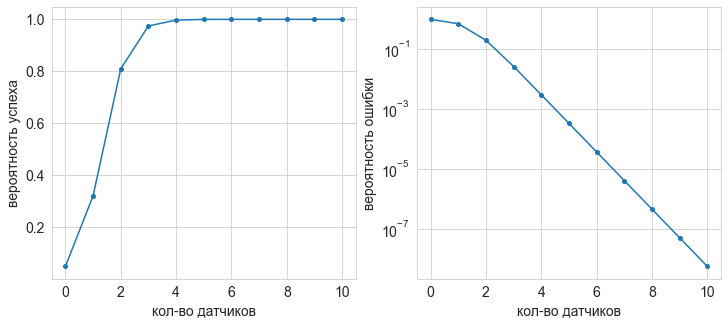

In [10]:
# Show data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1.plot(N, P, '-o')
ax1.set_xlabel('кол-во датчиков')
ax1.set_ylabel('вероятность успеха', rotation=90)

ax2.plot(N, 1-P, '-o')
ax2.set_yscale('log')
ax2.set_xlabel('кол-во датчиков')
ax2.set_ylabel('вероятность ошибки', rotation=90)
plt.show()

### Дополнительно

*Взято из книги Д. Шпигельхалтера &laquo;Искусство статистики. Как находить ответы в данных&raquo;*

#### Отношение правдоподобия и экспертиза

Согласно популярному мнению, распространению которого активно способствовал Уильям Шекспир, Ричард III был злобным горбуном.
И хотя это довольно спорная (впоследствии опровергнутая) точка зрения, доподлинно известно, что он был убит в битве при Босворте 22 августа 1485 года в возрасте 32 лет, что фактически положило конец войне Алой и Белой розы.
Тело его было после смерти изувечено и захоронено в монастыре Грейфрайерс в Лестере, который впоследствии был разрушен, а через какое-то время на его месте построили автостоянку.

С учетом только предоставленной информации мы можем предположить, что скелет принадлежит Ричарду III, если истинны все нижеперечисленные условия:

 - он действительно похоронен в монастыре Грейфрайерс;
 - его тело не было выкопано, перемещено или уничтожено за следующие 527 лет;
 - первый обнаруженный скелет действительно принадлежит Ричарду.
 
Предположим с изрядной долей пессимизма, что история о его похоронах правдива с вероятностью $50\,\%$ и что вероятность того, что скелет по-прежнему находится в месте захоронения в Грейфрайерсе, тоже $50\,\%$.
Представьте, что в указанном месте похоронено еще 100 тел.
Тогда вероятность того, что все вышеуказанные события подлинны, равна $\frac{1}{2} \times \frac{1}{2} \times \frac{1}{100} = \frac{1}{400}$.
Это довольно низкая вероятность того, что найденный скелет &mdash; Ричард III; исследователи, которые первоначально проводили анализ, приняли &laquo;скептическую&raquo; априорную вероятность равной $\frac{1}{40}$, так что мы гораздо скептичнее.

Однако детально исследовав скелет, археологи получили несколько примечательных результатов криминалистических экспертиз:

1. данные радиоуглеродного анализа костей (который дал 95-процентную вероятность, что они датируются периодом с 1456 по 1536 год);
1. подтверждение, что это был мужчина в возрасте около 30 лет с признаками сколиоза (искривления позвоночника);
1. доказательства того, что тело было изувечено после смерти и др.

Ценность каждого из фактов-доказательств можно выразить через их отношения правдоподобия
которые в данном случае определяются как отношение вероятности факта при условии, что это скелет Ричарда III к вероятности этого же факта при условии, что это скелет НЕ Ричарда III.

В таблице ниже показана шкала со словесными формулировками, рекомендованная для использования в английском суде.

**Таблица 1.** Рекомендуемые словесные интерпретации для отношений правдоподобия при предоставлении результатов криминалистической экспертизы в суде

Отн. правдоподобия | Формулировка
:---               | :---
1&ndash;10     | Слабое подтверждение
10&ndash;100   | Умеренное подтверждение
100&ndash;1 000 | Умеренно сильное подтверждение
1 000&ndash;10 000 | Сильное подтверждение
10 000&ndash;100 000 | Очень сильное подтверждение
100 000&ndash;1 000 000 | Чрезвычайно сильное подтверждение

**Таблица 2.** Отношения правдоподобия для отдельных фактов-доказательств в отношении скелета, найденного в Лестере. Сравниваются гипотезы, это скелет Ричарда III или нет.

Доказательство                  | Отн. правд. | Формулировка
:---                            | :---        | :---
Радиоуглеродное датирование     | 1.8         | Слабое подтверждение
Возраст и пол                   | 5.3         | Слабое подтверждение
Сколиоз                         | 212         | Умеренно сильное подтверждение
Раны после смерти               | 42          | Умеренное подтверждение
Совпадение митохондриальной ДНК | 478         | Умеренно сильное подтверждение
Несовпадение Y-хромосомы        | 0.16        | Слабое свидетельство против
Объединённое подтверждение      | 6.5e6       | Чрезвычайно сильное подтверждение

Насколько убедительны эти доказательства? Вспомните, что, прежде чем перейти к вычислениям отношений правдоподобия, мы сделали консервативную оценку $\frac{1}{400}$, что это скелет Ричарда III.
Это соответствует примерным начальным шансам 1 к 400.
Тогда по теореме Байеса мы получаем для апостериорных шансов число $\frac{6.5e6}{400} = 16250$. Таким образом, даже будучи предельно осторожными с оценкой априорных шансов и отношения правдоподобия, мы можем сказать, что шансы на то, что это скелет короля Ричарда, составляют
примерно 16 250 против 1.

#### Жульничает ли архиепископ Кентерберийский?

Известный экономист Джон Кейнс, изучая теорию вероятностей, придумал мысленный эксперимент,
демонстрирующий важность учёта начальных шансов при оценке последствий.

В этом упражнении он просил представить, что вы играете в покер с архиепископом Кентерберийским, который в первом же круге сдает себе роял-флеш.
Следует ли нам подозревать его в жульничестве?

Отношение правдоподобия для этого события равно отношению вероятности комбинации
роял-флеш при условии, что архиепископ жульничает к вероятности комбинации роял-флеш при условии, что архиепископу просто повезло.

Будем считать, что числитель равен единице, а вероятность в знаменателе можно вычислить как $\dfrac{1}{C^5_{52}} = \dfrac{1}{649740}$.
Тогда отношение правдоподобия составит примерно $6.5e5$, что означает &laquo;очень сильное подтверждение&raquo;, что архиепископ жульничает.
Но должны ли мы делать этот вывод?

Как говорит теорема Байеса, апостериорные шансы равны произведению отношения правдоподобия
на априорные шансы.
Кажется разумным предположить, что шансы на то, что архиепископ не жульничает, крайне высоки, возможно, $1e7$ к 1, учитывая его высокий духовный сан.
Поэтому произведение таких шансов и отношения правдоподобия даст нам $\dfrac{6.5e5}{1e7}$, то есть 6.5 к 100, что соответствует вероятности $\dfrac{6.5}{106.5} = 6\,\%$, что он жульничает.
Таким образом, на этом этапе мы можем себе позволить дать ему кредит доверия (чего не сделали бы по отношению к человеку, с которым, скажем, только что столкнулись в пабе).

**Пример:** риторический приём А. Невзорова.

---

## Источники

1. *Ширяев А.Н.* Вероятность &mdash; 1. &mdash; М.: МЦНМО, 2007. &mdash; 517 с.
1. *Чернова Н. И.* Теория вероятностей. Учебное пособие. &mdash; Новосибирск, 2007. &mdash; 160 с.
1. *Феллер В.* Введение в теорию вероятностей и её приложения. &mdash; М.: Мир, 1964. &mdash; 498 с.
1. *Шпигельхалтер Д.* Искусство статистики. Как находить ответы в данных. &mdash; М.: МИФ, 2021. &mdash; 448 с.

In [11]:
# Versions used
import sys
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.11
numpy: 1.20.3
matplotlib: 3.5.1
seaborn: 0.11.2
